<a href="https://colab.research.google.com/github/TalesDias/Tsoro-Yematatu-SI202/blob/main/SI202_Resolu%C3%A7%C3%A3o_de_Problemas_I_Tsoro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tsoro Yematatu

É um jogo de estratégia com origem no Zimbabue, onde dois jogadores movimentam suas peças em turnos em um tabuleiro de forma triangular. 
O objetivo do jogo é tentar formar uma linha de peças, sem permitir que o usuário faça o mesmo.

## Tabuleiro

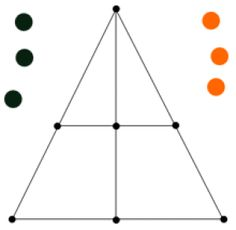

https://br.pinterest.com/pin/549650329507360361/

## Movimentação

1. O tabuleiro começa vazio no início.

2. Cada jogador deixa cair uma peça por jogada em qualquer ponto vago do tabuleiro. Os jogadores alternam seus turnos. As peças não podem ser movidas até que todas as seis tenham sido descartadas.

3. Uma peça pode ser movida de duas maneiras:

  a) Uma peça pode se mover um espaço por volta para um ponto vazio seguindo o padrão no tabuleiro.
 
  b) uma peça pode pular sobre outra peça (amigo ou inimigo) adjacente a e pousar em um ponto vazio do outro lado; o salto deve ser em linha reta e seguir o padrão do tabuleiro. 
  Não há capturas neste jogo.

4. Caso o jogador repita o movimento três vezes, a partida é encerrada e o jogador perde. 

5. O jogo pode durar muito tempo, então, será permitido um total de 50 jogadas.

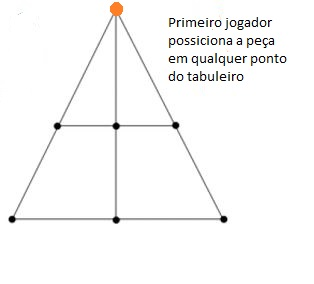

## Vitória

Vence aquele que conseguir fazer uma fileira com suas três peças na horizontal, vertical ou diagonal.

### Exemplos:

Obs: as imagens a seguir foram feitas pelo próprios alunos

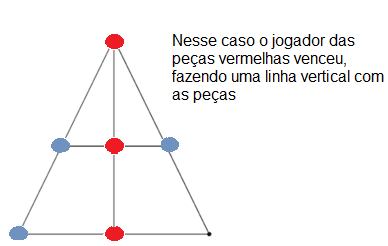

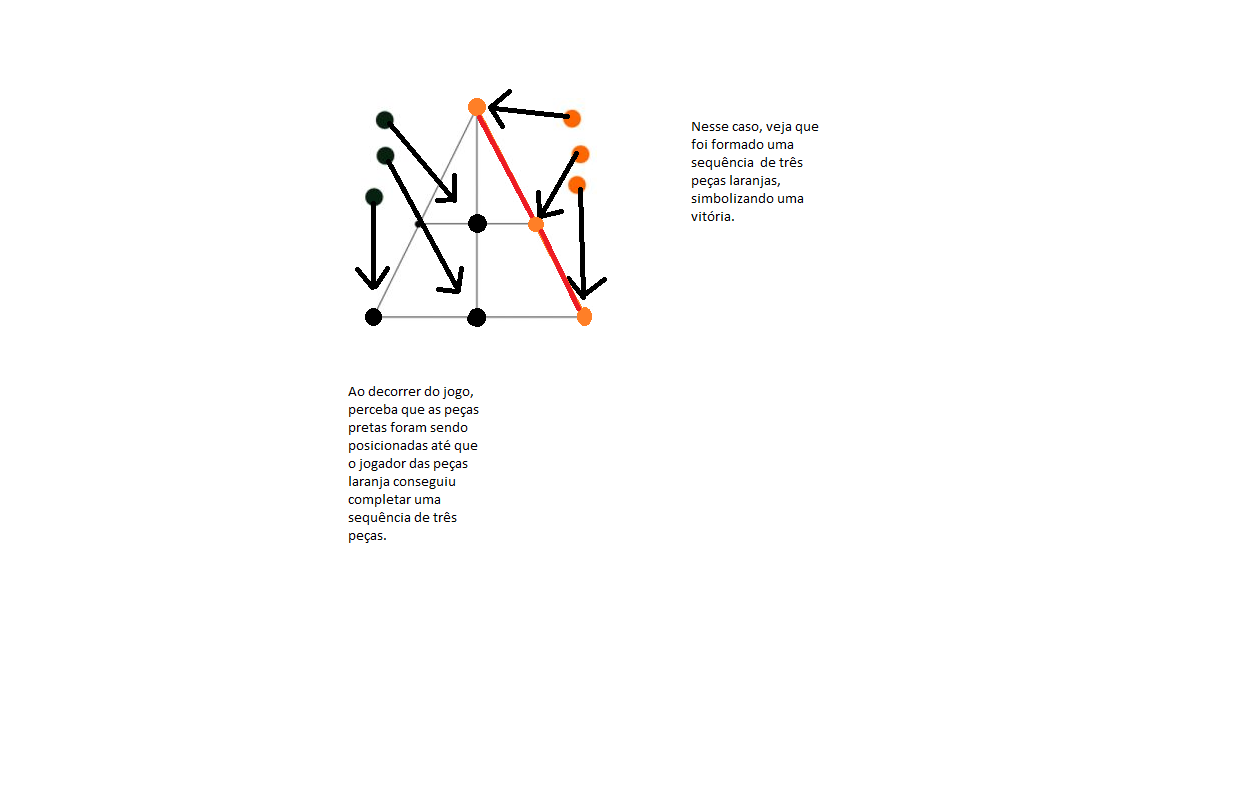


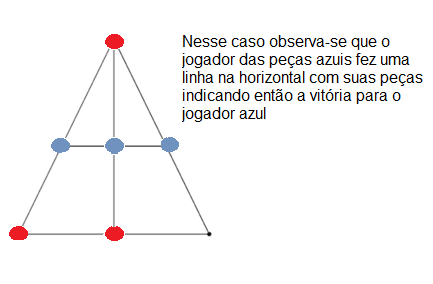


# Atividade 3




## Definição do tabuleiro

Semelhante ao tabuleiro definido para o jogo da velha, mas adaptado ao Tsoro, com apenas 7 itens. 

In [55]:
## Tabuleiro vazio
tab0 = (  0,
        0,0,0,
      0,  0,  0)
## Tabuleiro em que o jogador 1 vence
tab1 = (1,1,-1,-1,1,0,-1)

## Tabuleiro em que o jogador 2 vence
tab2 = (0,-1,-1,-1,1,1,1)

## Função Winner
Parecido com a funcao de ganhador do jogo da velha, porém agora as possiblidades de vitoria são reduzidas.

In [98]:
## Verifica a vitória a partir da soma das colunas e linhas
## tab1 é um exemplo de tabuleiro que o jogaador um vence
def vencedor(tabuleiro, rodada) :
  if(rodada>50): return 0
  somas = [
     tabuleiro[0]+tabuleiro[3]+tabuleiro[6],
     tabuleiro[0]+tabuleiro[2]+tabuleiro[5],
     tabuleiro[0]+tabuleiro[1]+tabuleiro[4],
         
     tabuleiro[1]+tabuleiro[2]+tabuleiro[3],
     tabuleiro[4]+tabuleiro[5]+tabuleiro[6]
  ]
  if min(somas) == -3 :
    return -1
  elif max(somas) == 3 :
    return +1
  else :
    return 0


print(vencedor(tab0,0)) # empate normal
print(vencedor(tab1,20))
print(vencedor(tab2,10))
print(vencedor(tab1,51)) # empate por número de jogadas

0
1
-1
0


## Função get_valid_moves

Primeiramente a função checa em qual fase o jogo está.
Se estiver ainda na primeira fase, retorna todas as casas vazias.
Já se o jogo estiver na segunda fase, a função verifica todas as possibilidades de chegar atéa casa vazia e descarta as inválidas.

In [85]:
def get_valid_moves(tab, rodada, player) :

  validas = []

  for i in range(len(tab)) :
    if tab[i] == 0 :
      validas.append((-1, i))

  if (rodada > 3):
    lin = [
           [0,3,6],
           [0,2,5],
           [0,1,4]
    ]
    col = [
           [1,2,3],
           [4,5,6]
    ]
    temp = []
    (o, d) = validas[0]
   
    linVal = [l for l in lin if d in l]
    for l in linVal:
      if(tab[l[0]] == player):
        temp.append((l[0],d))

      if(tab[l[1]] == player):
        temp.append((l[1],d))

      if(tab[l[2]] == player):
        temp.append((l[2],d))
    
    colVal = [c for c in col if d in c]
    for c in colVal:
      if(tab[c[0]] == player):
        temp.append((c[0],d))

      if(tab[c[1]] == player):
        temp.append((c[1],d))

      if(tab[c[2]] == player):
        temp.append((c[2],d))
    validas = temp

  return validas

In [87]:
tabuleiro = (-1, 1, -1, 1, -1 , 1, 0)
get_valid_moves(tabuleiro, 10,1)

[(3, 6), (5, 6)]

## Jogador ao acaso

Idêntico ao código do professor, após a execução da função que idêntifica quais casas estão vazias e com o parâmetro de qual peça conduzir, a função retorna um valor aleatório de casa a ser preenchida.

In [107]:
import random

def jogador_acaso(tab, rodada, turn) :
    jogadas_validas = get_valid_moves(tabuleiro, rodada , turn)
    if jogadas_validas :
        return random.choice(jogadas_validas)
     
tabuleiro = (0, 0, 0,  0, 0, 0,  0)

jogador_acaso(tabuleiro, 3,  -1)

(-1, 0)

## Interface Gráfica

A interface serve para o jogador humano compreender melhor o tabuleiro e tomar a melhor jogada.

Tambem é útil para compreender o nível dos jogadores não humanos atraves da inspeção de suas partidas

In [60]:
def draw_board(tab):
    from PIL import Image, ImageDraw
    posicoes = ((70, 10, 80, 20),
          (35, 80, 45, 90),
          (70, 80, 80, 90),
          (110, 80, 120, 90),
          (5, 135, 15, 145),
          (70, 135, 80, 145),
          (135, 135, 145, 145))

    board = Image.new('RGB', (150, 150),  "gray")
    draw  = ImageDraw.Draw(board)

    ## Desenhando o Triangulo
    draw.line((10, 140, 75, 10), fill = "black", width = 2) 
    draw.line((75, 10, 140, 140), fill = "black", width = 2) 
    draw.line((140, 140, 10, 140), fill = "black", width = 2) 

    ## Desenhando linhas internas
    draw.line((75, 10, 75, 140), fill = "black", width = 2) 
    draw.line((35, 85, 115, 85), fill = "black", width = 2) 

    for i in range(len(tab)) :
        if (tab[i] == -1):
            draw.ellipse(posicoes[i], fill="blue")
        elif(tab[i] == 1):
            draw.ellipse(posicoes[i], fill="orange")
    return board

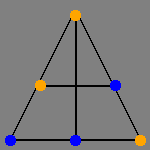

In [61]:
tabuleiro = (1,1,0,-1,-1,-1,1)
draw_board(tabuleiro)

## Jogador Humano

Neste código iremos fazer o jogador humano. Esse jogador será um ser humano que fonecerá as jogadas pelo teclado.


In [80]:
## Nesta parte iremos criar a função do jogador humano a qual irá receber como parâmetro o tabuleiro, rodada e turno.
## Retornando o turno origem e destino da peça

def jogador_humano(tab, rodada, turn) :

    validos  = get_valid_moves(tabuleiro, rodada, turn)
    verificar = (-1,-1)

    while not verificar in validos : 
        print(f'Escolha uma das seguintes jogadas: {validos}')
        display(draw_board(tab))
        
        origem,destino = eval(input()) 
    
        verificar = (origem,destino)    

      
    return (origem,destino)




In [ ]:
tabuleiro = (-1,-1,1,-1,1,0,1)
jogador_humano(tabuleiro, 20, 1)

## Gerenciador de Jogo

Há o tabuleiro, um jogador ao caso e uma jogador humano que pode conduzir. O que devemos fazer agora é criar um gerenciador de jogo para que uma partida possa ser iniciada.


In [111]:


## Abaixo uma função que gerencia um jogo. 
def game(player1, player2) :
    ## Inicialização
    turn   = 1
    tab    = (0,0,0,0,0,0,0) 
    result = 0 
    rodada = 0

    ## Lista que guardará o histórico
    history = [] 

    ## O jogo continua até que um dos breaks seja executado
    while True:
        ## Pedindo uma jogada ao jogador da vez.
        origem,destino = 0, 0
        if turn == 1:
            print(player1(tab, rodada, turn))
        else : 
            origem,destino = player2(tab, rodada, turn)

        ## Colocando a peça no tabuleiro
        ltab = list(tab)
        if rodada > 6:
            ltab[origem] = 0
        ltab[destino] = turn
        tab = tuple(ltab)
        
        ## Adicionando tabuleiro no histórico
        history.append(tab)

        ## Verificando se alguém ganhou
        result = vencedor(tab, rodada)
        if result :
            break

        rodada += 1
        if rodada>50 :
          result = 0
          break
        
        ## Trocando a vez de jogar
        turn = -turn
    
    return result, history

In [112]:
result, history = game(jogador_acaso, jogador_acaso)
print(result)
print(history)

(-1, 1)
(-1, 5)
None


TypeError: ignored